In [7]:
from qm.QuantumMachinesManager import QuantumMachinesManager
from qm.qua import *
from qm import SimulationConfig, LoopbackInterface
from QUA_config_two_sc_qubits import IBMconfig as config
from qm.simulate.credentials import create_credentials
from qua_utils import clip_qua, rand_gauss_moller_box
from videomode import ParameterTable, ParameterValue
from qiskit import pulse
from qiskit.circuit import Parameter, ParameterVector
from qiskit.pulse.library import SymbolicPulse

SymbolicPulse.disable_validation = True
# Open communication with the server.
qop_ip = None
qmm = QuantumMachinesManager(
    host="tyler-263ed49e.dev.quantum-machines.co",
    port=443,
    credentials=create_credentials(),
)
params = ParameterTable({"param1": 3.7, "param2": 4.5})
param_qiskit = ParameterVector("param", 2)
with program() as measureProg:
    var = params.declare_variables()
    ind = declare(int, value=5)
    print(var)
    clip_qua(params.get_parameter("param1"), 2, 4)
    save(var[0], "var0")
    with pulse.build() as sched:
        pulse.play(
            pulse.Drag(
                amp=param_qiskit[0], sigma=0.1, beta=param_qiskit[1], duration=160
            ),
            pulse.DriveChannel(0),
        )
    sched.assign_parameters({param_qiskit: var})
# Simulate the program on the server
# job = qmm.simulate(
#     config,
#     measureProg,
#     SimulationConfig(
#         4000,  # Duration of simulation in units of clock cycles (4 ns)
#         simulation_interface=LoopbackInterface(
#             [("con1", 1, "con1", 1)]
#         ),  # Simulate a loopback from analog output 1 to analog input 1
#     ),
# )

# Fetch the results of the simulation
# res = job.result_handles
# str = res.get("var").fetch_all()["value"]
# str
print(sched)

2024-04-16 17:52:38,111 - qm - INFO     - Performing health check
2024-04-16 17:52:38,949 - qm - INFO     - Health check passed
[<qm.qua._dsl._Variable object at 0x33a1baa10>, <qm.qua._dsl._Variable object at 0x177992c10>]


SympifyError: sympy2symengine: Cannot convert '<qm.qua._dsl._Variable object at 0x177992c10>' (of type <class 'qm.qua._dsl._Variable'>) to a symengine type.

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = service.get_backend("ibm_cairo")

cx = backend.target[("cx", (0, 1))]

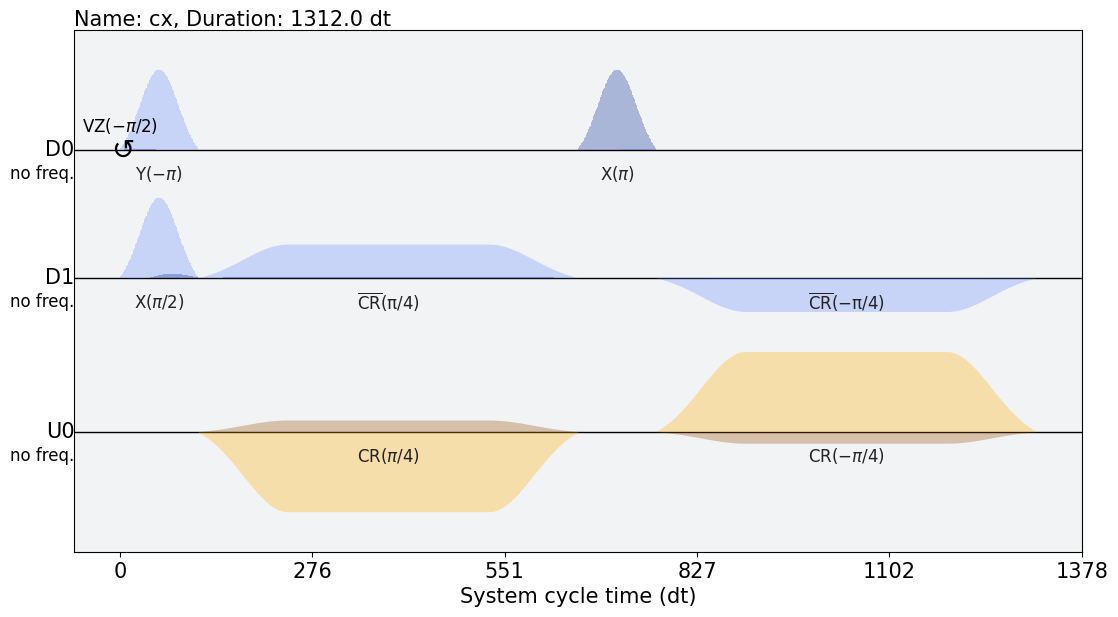

In [11]:
cx = backend.target["cx"][(0, 1)]
cx.calibration.draw()

In [26]:
cx.calibration.instructions[3][1].pulse.name

'X90p_d1'

In [39]:
from qiskit import pulse
from qiskit.circuit import QuantumCircuit, Parameter

a = Parameter("a")
p = pulse.Drag(amp=a, sigma=0.1, beta=0.5, duration=160)
for key, val in p.parameters.items():
    print(key, val)

duration 160
sigma 0.1
beta 0.5
amp a
angle 0.0


In [33]:
cst_p = pulse.Constant(160, 0.5)
cst_p

Constant(duration=160, amp=0.5, angle=0.0)

In [35]:
cst_p.duration

160

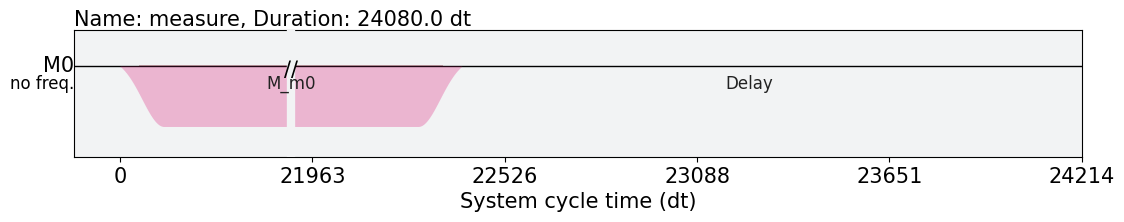

In [47]:
from qiskit_ibm_runtime.fake_provider import FakeJakartaV2
from qiskit.circuit import QuantumCircuit
from qiskit import transpile, schedule

backend = FakeJakartaV2()
backend.target["measure"][(0,)].calibration.draw()

In [48]:
backend.target["measure"][(0,)].calibration

Schedule((0, Acquire(22400, AcquireChannel(0), MemorySlot(0))), (0, Acquire(22400, AcquireChannel(1), MemorySlot(1))), (0, Acquire(22400, AcquireChannel(2), MemorySlot(2))), (0, Acquire(22400, AcquireChannel(3), MemorySlot(3))), (0, Acquire(22400, AcquireChannel(4), MemorySlot(4))), (0, Acquire(22400, AcquireChannel(5), MemorySlot(5))), (0, Acquire(22400, AcquireChannel(6), MemorySlot(6))), (0, Play(GaussianSquare(duration=22400, sigma=64, width=22144, amp=0.1955, angle=3.124464656973071, name='M_m0'), MeasureChannel(0), name='M_m0')), (22400, Delay(1680, MeasureChannel(0))), name="measure")

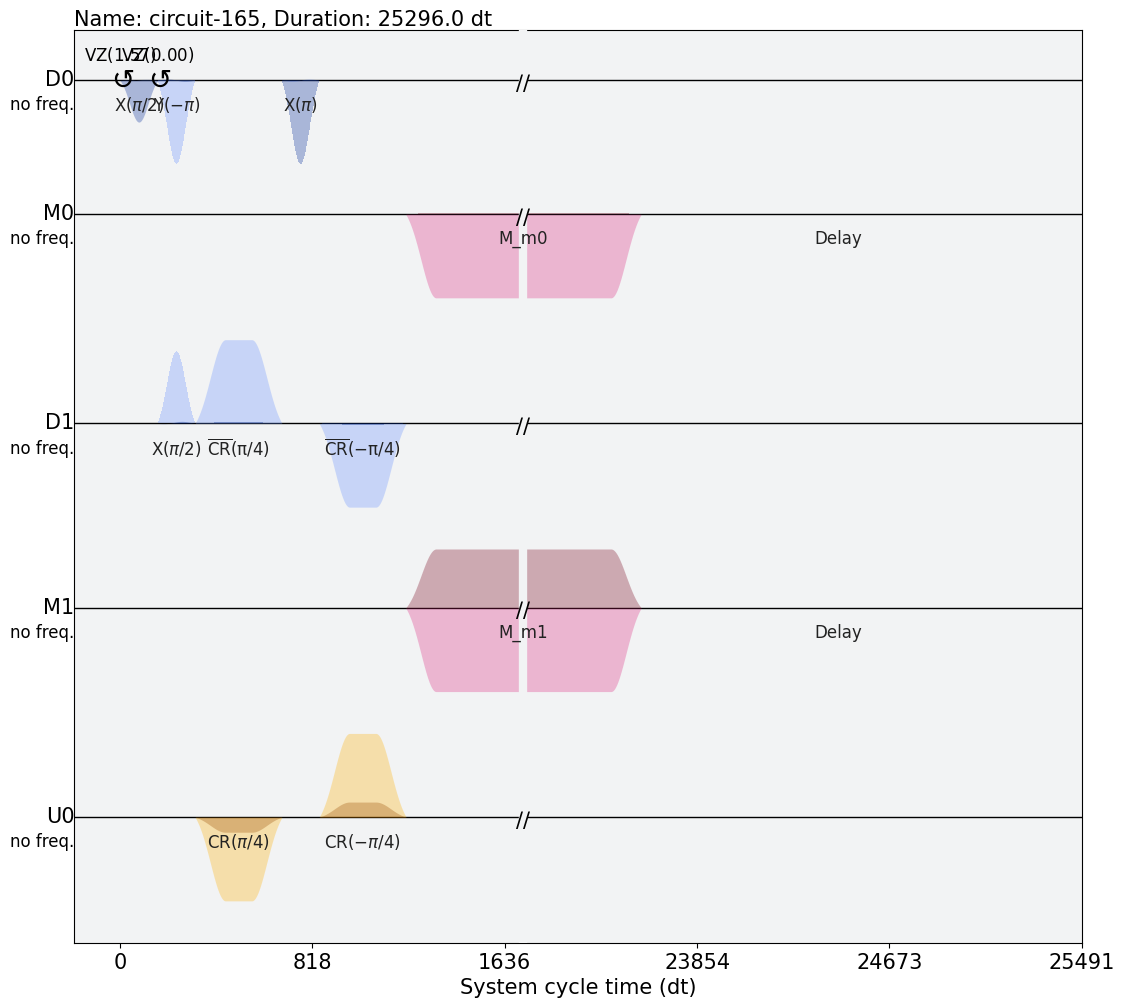

In [49]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
transpiled_qc = transpile(qc, backend)
sched = schedule(transpiled_qc, backend)
sched.draw()

In [50]:
sched

Schedule((0, ShiftPhase(-1.5707963268, DriveChannel(0))), (0, ShiftPhase(-1.5707963268, ControlChannel(1))), (0, Play(Drag(duration=160, sigma=40, beta=-1.0522991222950833, amp=0.10071860022027769, angle=0.008331009463217867, name='X90p_d0'), DriveChannel(0), name='X90p_d0')), (160, ShiftPhase(-1.5707963268, DriveChannel(0))), (160, ShiftPhase(1.5707963267948966, DriveChannel(0))), (160, ShiftPhase(-1.5707963268, ControlChannel(1))), (160, ShiftPhase(1.5707963267948966, ControlChannel(1))), (160, Play(Drag(duration=160, sigma=40, beta=-1.0205387662332952, amp=0.2012211411684789, angle=-1.5707963267948968, name='Ym_d0'), DriveChannel(0), name='Ym_d0')), (160, Play(Drag(duration=160, sigma=40, beta=-0.968549607705977, amp=0.09683699950387357, angle=0.02080553739417185, name='X90p_d1'), DriveChannel(1), name='X90p_d1')), (320, Play(GaussianSquare(duration=368, sigma=64, width=112, amp=0.11225338480773679, angle=0.015092743952178559, name='CR90p_d1_u0'), DriveChannel(1), name='CR90p_d1_u0'

In [1]:
from quam.components import *
from quam.examples.superconducting_qubits import Transmon, QuAM

machine = QuAM()  #

num_qubits = 2
for idx in range(num_qubits):
    # Create transmon qubit component
    transmon = Transmon(id=idx)
    machine.qubits[transmon.name] = transmon

    # Add xy drive line channel
    transmon.xy = IQChannel(
        opx_output_I=("con1", 3 * idx + 3),
        opx_output_Q=("con1", 3 * idx + 4),
        frequency_converter_up=FrequencyConverter(
            mixer=Mixer(),
            local_oscillator=LocalOscillator(power=10, frequency=6e9),
        ),
        intermediate_frequency=100e6,
    )

    # Add transmon flux line channel
    transmon.z = SingleChannel(opx_output=("con1", 3 * idx + 5))

    # Add resonator channel
    transmon.resonator = InOutIQChannel(
        id=idx,
        opx_output_I=("con1", 3 * idx + 1),
        opx_output_Q=("con1", 3 * idx + 2),
        opx_input_I=("con1", 1),
        opx_input_Q=(
            "con1",
            2,
        ),
        frequency_converter_up=FrequencyConverter(
            mixer=Mixer(), local_oscillator=LocalOscillator(power=10, frequency=6e9)
        ),
    )

2024-05-08 10:47:08,531 - qm - INFO     - Starting session: 0d5bb0ce-e1c7-4469-96f3-062aaaad1647


In [8]:
from quam.components.pulses import GaussianPulse

# Create a Gaussian pulse
gaussian_pulse = GaussianPulse(length=20, amplitude=0.2, sigma=3)

# Attach the pulse to the XY channel of the first qubit
machine.qubits["q0"].xy.operations["X90"] = gaussian_pulse

In [74]:
machine.qubits

{'q0': Transmon(id=0, xy=IQChannel(operations={'X90': GaussianPulse(length=20, id=None, digital_marker=None, amplitude=0.2, sigma=3, axis_angle=None, subtracted=True)}, id=None, digital_outputs={}, opx_output_I=('con1', 3), opx_output_Q=('con1', 4), opx_output_offset_I=None, opx_output_offset_Q=None, frequency_converter_up=FrequencyConverter(local_oscillator=LocalOscillator(frequency=6000000000.0, power=10), mixer=Mixer(local_oscillator_frequency=6000000000.0, intermediate_frequency=100000000.0, correction_gain=0, correction_phase=0), gain=None), intermediate_frequency=100000000.0), z=SingleChannel(operations={}, id=None, digital_outputs={}, opx_output=('con1', 5), filter_fir_taps=None, filter_iir_taps=None, opx_output_offset=None, intermediate_frequency=None), resonator=InOutIQChannel(operations={}, id=0, digital_outputs={}, opx_output_I=('con1', 1), opx_output_Q=('con1', 2), opx_output_offset_I=None, opx_output_offset_Q=None, frequency_converter_up=FrequencyConverter(local_oscillator

In [72]:
from qiskit.circuit import Parameter, ParameterVector, QuantumCircuit
from qiskit.primitives import BackendEstimatorV2
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.quantum_info import SparsePauliOp

param = Parameter("param")
param_vec = ParameterVector("param", 2)
qc = QuantumCircuit(2)
qc.rx(param, 0)
qc.ry(param_vec[0], 0)
qc.rz(param_vec[1], 0)

obs = SparsePauliOp.from_list([("XX", 3.0), ("YY", 2.0)])
backend = GenericBackendV2(2)
estimator = BackendEstimatorV2(backend=backend)

job = estimator.run(
    [(qc, obs, {param: [0.5, 0.3], param_vec: [[0.3, 0.7], [0.2, 0.4]]})]
)
result = job.result()

In [54]:
result[0].data.evs

array([-0.03710938,  0.14013672])

In [46]:
qc.parameters

ParameterView([Parameter(param), ParameterVectorElement(param[0]), ParameterVectorElement(param[1])])